Bài 3 : Sử dụng CNN từ chương trình bài 2 thực hiện nhận dạng mặt người từ bài 9 của Chương 2. So sánh kết quả với khi sử dụng ANN

	SV hiểu được ANN vẫn có thể xử lý các bài toán xử lý phân loại ảnh. Tuy nhiên CNN sẽ hiệu quả trong việc tự động trích rút đặc trưng


In [3]:
import numpy as np

target = np.floor(np.random.random((20,1))*8)
print(target)

one_hot_target = np.zeros((target.shape[0],8))
for i in range(target.shape[0]):
    one_hot_target [i, target[i].astype('int')] = 1

print(one_hot_target)

[[3.]
 [7.]
 [3.]
 [0.]
 [3.]
 [1.]
 [6.]
 [7.]
 [1.]
 [2.]
 [4.]
 [1.]
 [3.]
 [0.]
 [0.]
 [6.]
 [6.]
 [7.]
 [4.]
 [7.]]
[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=70)
faces.images[1]

array([[0.14509805, 0.1633987 , 0.21437909, ..., 0.22352941, 0.1751634 ,
        0.13333334],
       [0.16601308, 0.21830066, 0.24183007, ..., 0.22875817, 0.21045752,
        0.16470589],
       [0.18169935, 0.25490198, 0.2901961 , ..., 0.20130719, 0.20784314,
        0.16209151],
       ...,
       [0.2888889 , 0.29673204, 0.3006536 , ..., 0.48104575, 0.4431373 ,
        0.45751634],
       [0.29673204, 0.29673204, 0.29803923, ..., 0.46405232, 0.44052288,
        0.46405232],
       [0.30457518, 0.3006536 , 0.29411766, ..., 0.44575164, 0.4509804 ,
        0.58300656]], dtype=float32)

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping



3
George W Bush


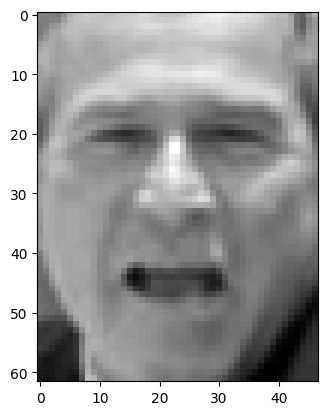

In [36]:
plt.imshow(faces.images[10], cmap = 'gray')
print(faces.target[10])
print(faces.target_names[faces.target[10]])



In [37]:
X = faces.images
print(X.shape)

target = faces.target
print(target.shape)
print(np.max(target))

one_hot_target = np.zeros((target.shape[0],7))
for i in range(target.shape[0]):
    one_hot_target [i, target[i].astype('int')] = 1

print(target[0:10])
print(one_hot_target[0:10])

(1288, 62, 47)
(1288,)
6
[5 6 3 1 0 1 3 4 3 0]
[[0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


In [40]:
y = faces.target 
X = faces.data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], 62, 47, 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 62, 47, 1).astype('float32') / 255.0

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(62, 47, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")



Epoch 1/20


d:\app\python\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3580 - loss: 2.0277 - val_accuracy: 0.4369 - val_loss: 1.6654
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3675 - loss: 1.8249 - val_accuracy: 0.4369 - val_loss: 1.6571
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.3746 - loss: 1.7949 - val_accuracy: 0.4369 - val_loss: 1.6678
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3961 - loss: 1.7629 - val_accuracy: 0.4369 - val_loss: 1.6349
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4037 - loss: 1.6943 - val_accuracy: 0.4369 - val_loss: 1.6371
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.3889 - loss: 1.6826 - val_accuracy: 0.4563 - val_loss: 1.5108
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4484 - loss: 1.5414 - val_accuracy: 0.5146 - val_loss: 1.3458
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4944 - loss: 1.4238 - val_accuracy: 0.5534 - val_loss: 1.